# PyBEL Demo

This demo shows the ease of downloading a sample BEL file by URL and parsing it with `PyBEL`. 

In [1]:
import os
import logging
import json
import time
import math
from collections import Counter
from operator import itemgetter
import shutil

import requests
import pandas as pd
import pybel
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

'Run on {} with PyBEL Version {}'.format(time.asctime(), pybel.__version__)

'Run on Tue Oct 25 22:20:19 2016 with PyBEL Version 0.2.4-dev'

In [2]:
logging.basicConfig(level=logging.INFO)
logging.getLogger("requests").setLevel(logging.WARNING)

# Small Corpus

The example small corpus is distributed by Selventa and the OpenBEL Consortium and has "approximately 2000 hand curated statements drawn from 57 PubMeds"

In [3]:
%%time
small_url = 'http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel'
small_path = os.path.expanduser('~/.pybel/bel/small_corpus.bel')

r = requests.get(small_url, stream=True)
if r.status_code == 200:
    with open(small_path, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f) 

CPU times: user 19.2 ms, sys: 10.9 ms, total: 30.1 ms
Wall time: 684 ms


## Using `pybel`

In [4]:
small_pickle_path = os.path.expanduser('~/.pybel/bel/small_corpus.gpickle')

rerun = True
if os.path.exists(small_pickle_path) and not rerun:
    g_small = pybel.from_pickle(pickle_path)
else:
    %time g_small = pybel.from_path(small_path)
    pybel.to_pickle(g_small, small_pickle_path)

INFO:pybel:Loading from path: /Users/cthoyt/.pybel/bel/small_corpus.bel
INFO:pybel:File length: 3596 lines
INFO:pybel:Loading definition cache from sqlite:////Users/cthoyt/.pybel/data/namespace_cache.db
INFO:pybel:Initiation of definition cache took 0.012070 seconds
INFO:pybel:Finished parsing document section in 0.00 seconds
INFO:pybel:Finished parsing definitions section in 2.74 seconds
INFO:pybel:Streamlining BEL parser
INFO:pybel:Finished Streamlining BEL parser in 4.77s
INFO:pybel:Finished parsing statements section in 14.80 seconds


CPU times: user 22.2 s, sys: 531 ms, total: 22.8 s
Wall time: 22.8 s


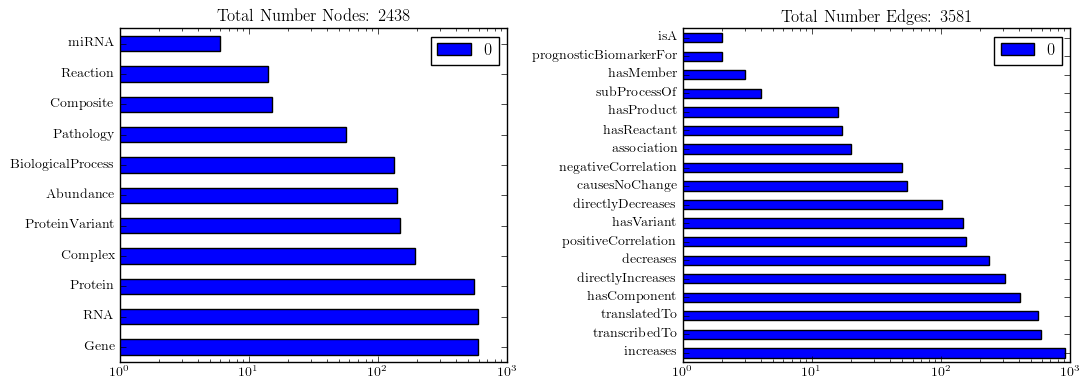

In [5]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g_small), orient='index')
ec = Counter(data[2]['relation'] for data in g_small.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Total Number Nodes: {}'.format(g_small.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Total Number Edges: {}'.format(g_small.number_of_edges()))

plt.tight_layout()
plt.show()

CPU times: user 34.3 s, sys: 119 ms, total: 34.4 s
Wall time: 34.5 s


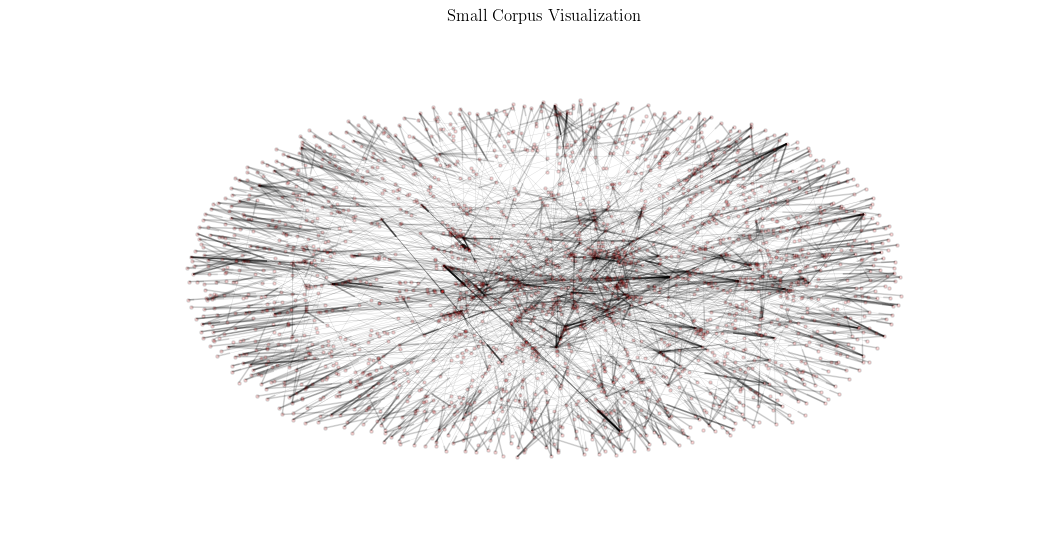

In [6]:
%%time
plt.figure(figsize=(10, 5))
nx.draw_spring(g_small, 
               k=4/math.sqrt(len(g_small)),
               iterations=1000,
               node_size=5, 
               width=0.3,  
               alpha=0.15)
plt.title('Small Corpus Visualization')

## Using `bel.rb`

In [7]:
%%time
!bel bel2rdf --bel ~/.pybel/bel/small_corpus.bel > ~/.pybel/bel/small_corpus.rdf

Warning - Reusing value database.
  URL:  http://resource.belframework.org/belframework/1.0/namespace/selventa-legacy-diseases.belns
  File: /var/folders/_0/1_bryhyd2bqb6hjp0m1jclk80000gn/T/belresources/DaJpV891Wc3yPL0GtGK9bW7leGM.gdbm
Warning - Reusing value database.
  URL:  http://resource.belframework.org/belframework/1.0/namespace/selventa-named-rat-protein-families.belns
  File: /var/folders/_0/1_bryhyd2bqb6hjp0m1jclk80000gn/T/belresources/JwgWLXyTbo5FrCj07aIIOFhWBaE.gdbm
Warning - Reusing value database.
  URL:  http://resource.belframework.org/belframework/1.0/namespace/mgi-approved-symbols.belns
  File: /var/folders/_0/1_bryhyd2bqb6hjp0m1jclk80000gn/T/belresources/2WyAb0puDednR9fFXKpvDJP7vPk.gdbm
Warning - Reusing value database.
  URL:  http://resource.belframework.org/belframework/1.0/namespace/selventa-named-mouse-protein-families.belns
  File: /var/folders/_0/1_bryhyd2bqb6hjp0m1jclk80000gn/T/belresources/LvCYCdRd+Sxo7JrLK2qaHwWL5sk.gdbm
Warning - Reusing value database.
  

# Large Corpus

In [8]:
large_pickle_path = os.path.expanduser('~/.pybel/bel/large_corpus.gpickle')

rerun = False
if os.path.exists(large_pickle_path) and not rerun:
    g_large = pybel.from_pickle(large_pickle_path)
else:
    large_url = 'http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel'
    large_path = os.path.expanduser('~/.pybel/bel/large_corpus.bel')

    r = requests.get(large_url, stream=True)
    if r.status_code == 200:
        with open(large_path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f) 
    %time g_large = pybel.from_path(large_path)
    pybel.to_pickle(g_large, large_pickle_path)

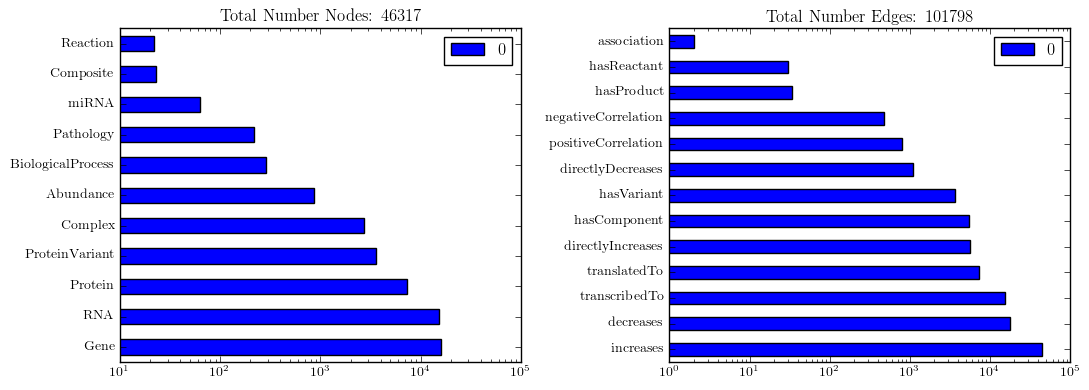

In [9]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g_large), orient='index')
ec = Counter(data[2]['relation'] for data in g_large.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Total Number Nodes: {}'.format(g_large.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Total Number Edges: {}'.format(g_large.number_of_edges()))

plt.tight_layout()
plt.show()